## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [09] : [Algoritma Partisi] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [97]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Fernando Khorasani"
myNIM = "43088"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Fernando Khorasani
NIM: 		43088
Start: 		2022-11-08 19:49:42.458598
Device ID: 	d09b3101-5f63-11ed-b6fd-782b46918710



---

### Dataset yang dipakai:

1. [Iris] – sumber : [https://www.kaggle.com/datasets/uciml/iris
    = dataset yang mengklasifikasikan iris menjadi tiga kategori
2. [Credit Card Approvals (Clean Data)] – sumber : [https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data
    = dataset yang berisi data-data untuk menyetujui kartu kredit

### Hasil kerja

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

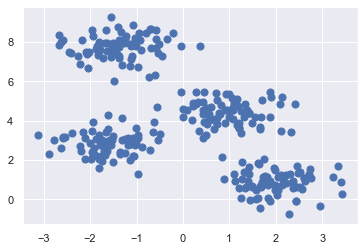

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                         cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

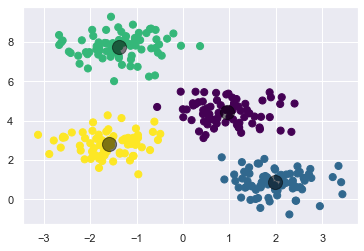

In [5]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5)

## K-Means: Expectation-Maximization

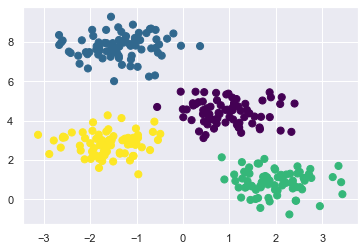

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1.Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

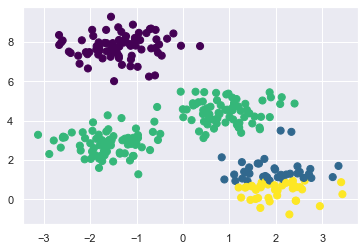

In [7]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

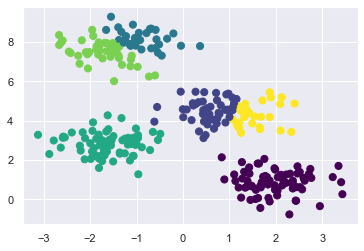

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

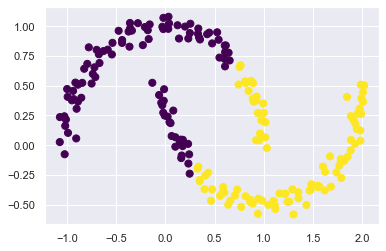

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


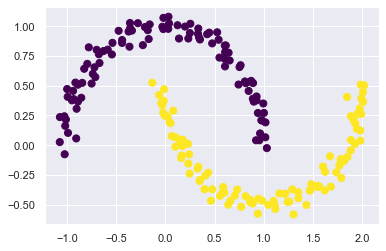

In [11]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

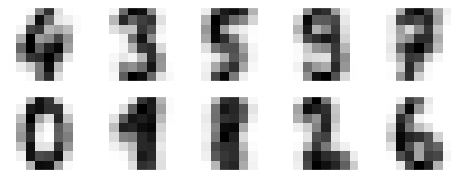

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [15]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

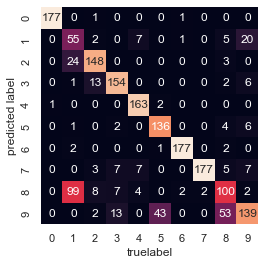

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('truelabel')
plt.ylabel('predicted label');

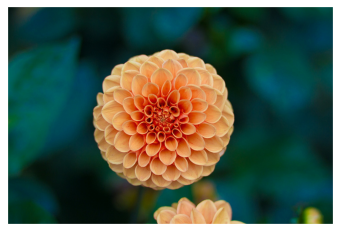

In [18]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [19]:
flower.shape

(427, 640, 3)

In [20]:
data = flower / 255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);

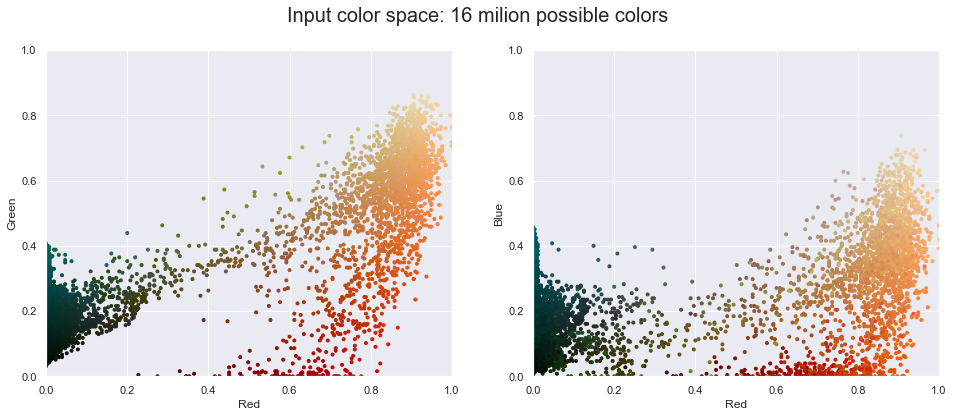

In [22]:
plot_pixels(data, title='Input color space: 16 milion possible colors')

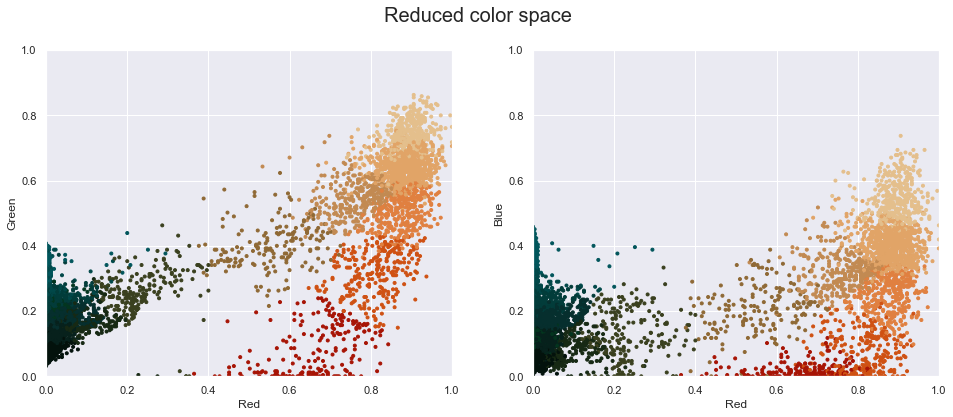

In [24]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space")

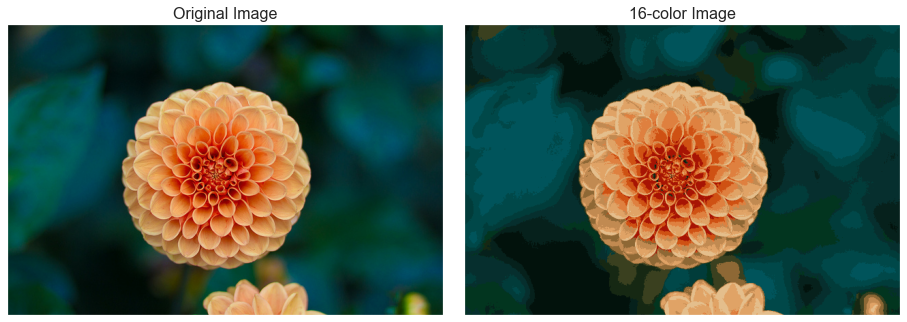

In [25]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## K-Medoids Algorithm

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [28]:
# Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

target = iris.target_names
labels = iris.target

In [29]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [30]:
#PCA Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                            'principal component 2',
                                                            'principal component 3'])
datapoints = PCAdf.values
m, f = datapoints.shape
k = 3

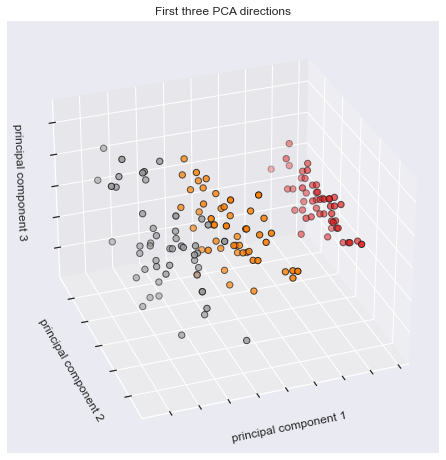

In [31]:
#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 3")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [32]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)

In [33]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided,
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p
    
    return S

S = compute_d_p(datapoints, medoids_initial, 2)

In [34]:
def assign_labels(S):
    return np.argmin(S, axis=1)

labels = assign_labels(S)

In [35]:
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
    
    out_medoids = medoids
    
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
        
        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
            
        return out_medoids

In [36]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [37]:
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
    
    converged = False
    labels = np.zeros(len(X))
    i = 1
    
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

In [38]:
# Count
def mark_matches(a, b, exact=False):
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches
    
    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if(2 * num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

In [39]:
def count_matches(a, b, exact=False):
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches, "macthes out of", len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

146 macthes out of 150 data points (~ 97.3%)


## K-Modes Algorithm

In [56]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')
#Importing all required packages
import numpy as np
import pandas as pd
#Data via lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [57]:
clean = pd.read_csv('clean_dataset.csv')
clean.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [58]:
clean.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [59]:
cldata = clean[['Age', 'Industry', 'Ethnicity', 'Citizen']]
cldata.head()

,Age,Industry,Ethnicity,Citizen
0,30.83,Industrials,White,ByBirth
1,58.67,Materials,Black,ByBirth
2,24.50,Materials,Black,ByBirth
3,27.83,Industrials,White,ByBirth
4,20.17,Industrials,White,ByOtherMeans


In [60]:
## Converting age into categorical variable 
cldata['age_bin'] = pd.cut(cldata['Age'], [0, 20,30,40,50,60,70,80,90,100],
 labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70',
 '70-80', '80-90', '90-100'])
cldata = cldata.drop('Age', axis=1)
cldata.head()

,Industry,Ethnicity,Citizen,age_bin
0,Industrials,White,ByBirth,30-40
1,Materials,Black,ByBirth,50-60
2,Materials,Black,ByBirth,20-30
3,Industrials,White,ByBirth,20-30
4,Industrials,White,ByOtherMeans,20-30


In [61]:
cldata.shape

(690, 4)

In [62]:
cldata.describe()

,Industry,Ethnicity,Citizen,age_bin
count,690,690,690,690
unique,14,5,3,8
top,Energy,White,ByBirth,20-30
freq,146,408,625,297


In [63]:
cldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Industry   690 non-null    object  
 1   Ethnicity  690 non-null    object  
 2   Citizen    690 non-null    object  
 3   age_bin    690 non-null    category
dtypes: category(1), object(3)
memory usage: 17.3+ KB


In [64]:
## Checking Null Values
cldata.isnull().sum()*100/cldata.shape[0]

Industry     0.0
Ethnicity    0.0
Citizen      0.0
age_bin      0.0
dtype: float64

In [65]:
cldata_copy = cldata.copy()

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cldata = cldata.apply(le.fit_transform)
cldata.head()

,Industry,Ethnicity,Citizen,age_bin
0,7,4,0,2
1,9,1,0,4
2,9,1,0,1
3,7,4,0,1
4,7,4,1,1


In [52]:
!pip install kmodes

In [53]:
pip install --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


In [69]:
from kmodes.kmodes import KModes

In [71]:
km_cao = KModes(n_clusters=2, init="Cao", n_init=1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cldata)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1124.0


In [73]:
## Predicting Clusters
fitClusters_cao

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [76]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = cldata.columns

In [78]:
## Node of the clusters
clusterCentroidsDf

,Industry,Ethnicity,Citizen,age_bin
0,4,4,0,1
1,9,1,0,2


In [79]:
km_huang = KModes(n_clusters=2, init="Huang", n_init=1, verbose=1)
fitClusters_huang = km_huang.fit_predict(cldata)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 1143.0
Run 1, iteration: 2/100, moves: 26, cost: 1143.0


In [81]:
cost = []
for num_clusters in list(range(1, 5)):
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kmode.fit_predict(cldata)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1124.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 949.0


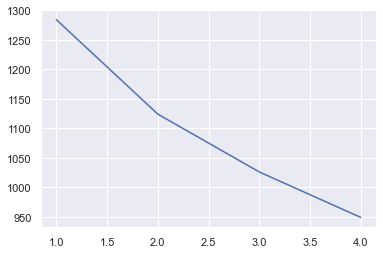

In [82]:
y = np.array([i for i in range(1, 5, 1)])
plt.plot(y, cost)

In [83]:
## Choosing K=2
km_cao = KModes(n_clusters=2, init="Cao", n_init=1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cldata)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1124.0


In [84]:
fitClusters_cao

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [85]:
cldata = cldata_copy.reset_index()

In [86]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cldata, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis=1)

In [87]:
combinedDf.head()

,Industry,Ethnicity,Citizen,age_bin,cluster_predicted
0,Industrials,White,ByBirth,30-40,0
1,Materials,Black,ByBirth,50-60,1
2,Materials,Black,ByBirth,20-30,1
3,Industrials,White,ByBirth,20-30,0
4,Industrials,White,ByOtherMeans,20-30,0


In [88]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [89]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 688
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Industry           576 non-null    object  
 1   Ethnicity          576 non-null    object  
 2   Citizen            576 non-null    object  
 3   age_bin            576 non-null    category
 4   cluster_predicted  576 non-null    uint16  
dtypes: category(1), object(3), uint16(1)
memory usage: 20.1+ KB


In [90]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1 to 689
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Industry           114 non-null    object  
 1   Ethnicity          114 non-null    object  
 2   Citizen            114 non-null    object  
 3   age_bin            114 non-null    category
 4   cluster_predicted  114 non-null    uint16  
dtypes: category(1), object(3), uint16(1)
memory usage: 4.3+ KB


<AxesSubplot:xlabel='Industry', ylabel='count'>

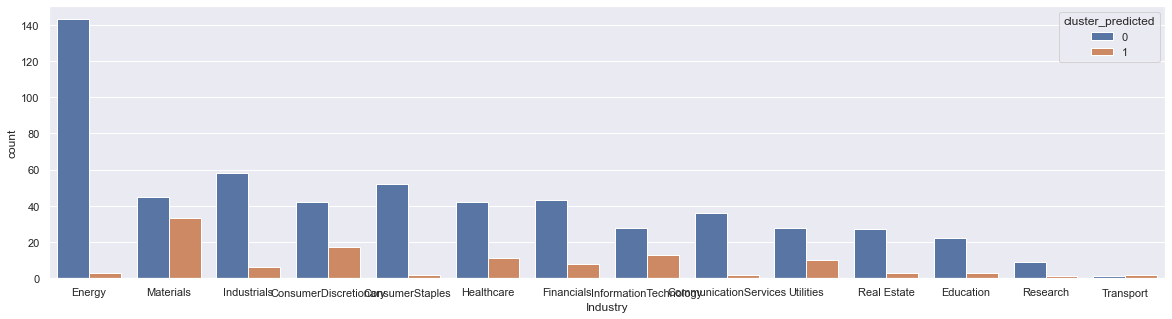

In [92]:
#Job
plt.subplots(figsize=(20,5))
sns.countplot(x=combinedDf['Industry'],
 order=combinedDf['Industry'].value_counts().index, hue=combinedDf['cluster_predicted'])

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

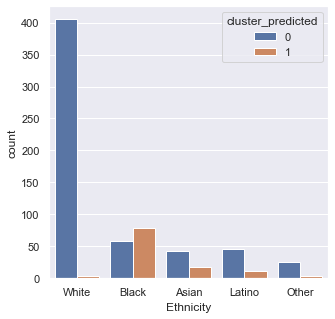

In [93]:
#Marital
plt.subplots(figsize=(5,5))
sns.countplot(x=combinedDf['Ethnicity'],
 order=combinedDf['Ethnicity'].value_counts().index, hue=combinedDf['cluster_predicted'])


<AxesSubplot:xlabel='Citizen', ylabel='count'>

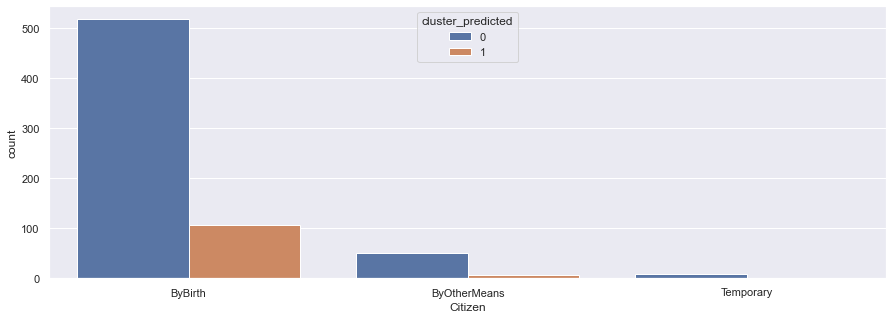

In [94]:
#Education
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDf['Citizen'],
 order=combinedDf['Citizen'].value_counts().index, hue=combinedDf['cluster_predicted'])


<AxesSubplot:xlabel='age_bin', ylabel='count'>

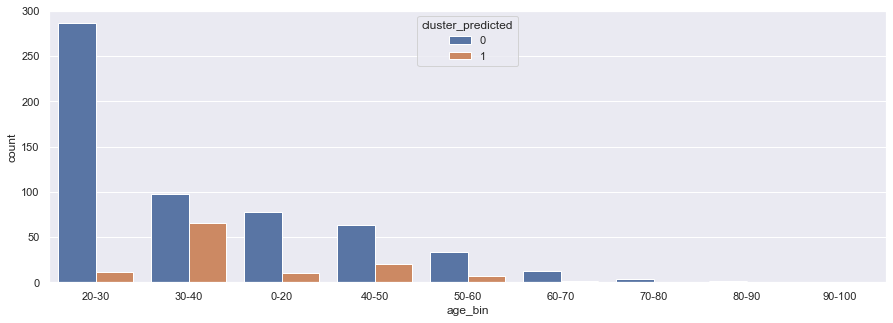

In [95]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDf['age_bin'],
 order=combinedDf['age_bin'].value_counts().index, hue=combinedDf['cluster_predicted'])


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada dataset pertama, yaitu Iris Dataset. Saya melakukan percobaan dengan metode K-Means Clustering dan K-Medoids. Dengan metode tersebut, didapatkan akurasi sebesar 97.3%, dimana jumlah kecocokannya sebesar 146 dari 150. Dengan begitu, dataset ini dapat dikategorikan sebagai dataset yang sangat baik untuk digunakan
    - Pada dataset kedua, menggunakan dataset yang berbentuk kategorikal untuk melakukan percobaan clustering dengan K-Modes. Percobaan ini dilakukan dengan mengambil 5 kolom sebagai predicted cluster. Data 1, 4, dan 5 dimasukkan ke cluster 0. Data ke 2 dan 3 dimasukkan ke cluster 1. Setelah itu, dilakuan plotting untuk mengetahui predicted clusternya

In [98]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Fernando Khorasani
NIM: 	43088
Time-stamp:	2022-11-08 19:49:49.495824


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [99]:
!jupyter nbconvert --to html "./IF540_BL_43088_FernandoKhorasani_Week09.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_BL_43088_FernandoKhorasani_Week09.ipynb to html
[NbConvertApp] Writing 2229331 bytes to IF540_BL_43088_FernandoKhorasani_Week09.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#